In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the sales dataset into a DataFrame
sales_df = pd.read_csv(r"C:\Users\JASH NANDANIA\P_Datasets\Amazon_sales\amazon.csv")

In [3]:
# Checking sales_df info
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [4]:
# Checking datatypes of all columns 
print(sales_df.dtypes)

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


In [5]:
# Convert to string before applying str.replace()
sales_df['discounted_price'] = sales_df['discounted_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
sales_df['actual_price'] = sales_df['actual_price'].astype(str).str.replace('₹', '').str.replace(',', '').astype(float)
sales_df['discount_percentage'] = sales_df['discount_percentage'].astype(str).str.replace('%', '').astype(float)

# Convert rating & rating_count to numeric safely
sales_df['rating'] = pd.to_numeric(sales_df['rating'], errors='coerce')
sales_df['rating_count'] = sales_df['rating_count'].astype(str).str.replace(',', '').astype(float)

In [6]:
# Check for missing value
sales_df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [7]:
# Check for duplicate rows
sales_df.duplicated().sum()

0

In [8]:
# Summary statistics for numerical columns
print(sales_df.describe())

       discounted_price   actual_price  discount_percentage       rating  \
count       1465.000000    1465.000000          1465.000000  1464.000000   
mean        3125.310874    5444.990635            47.691468     4.096585   
std         6944.304394   10874.826864            21.635905     0.291674   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000            32.000000     4.000000   
50%          799.000000    1650.000000            50.000000     4.100000   
75%         1999.000000    4295.000000            63.000000     4.300000   
max        77990.000000  139900.000000            94.000000     5.000000   

        rating_count  
count    1463.000000  
mean    18295.541353  
std     42753.864952  
min         2.000000  
25%      1186.000000  
50%      5179.000000  
75%     17336.500000  
max    426973.000000  


In [9]:
# Set max row limit to None
pd.set_option('display.max_rows', None)

In [10]:
# Count of products per unique category
print(sales_df['category'].value_counts())

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                                          233
Electronics|WearableTechnology|SmartWatches                                                                                 76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                                        68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                                               63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                                                52
Electronics|HomeTheater,TV&Video|Accessories|RemoteControls                                                                 49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders                                                    27
Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables                                        

<Axes: title={'center': 'Top 10 Product Categories'}, xlabel='category'>

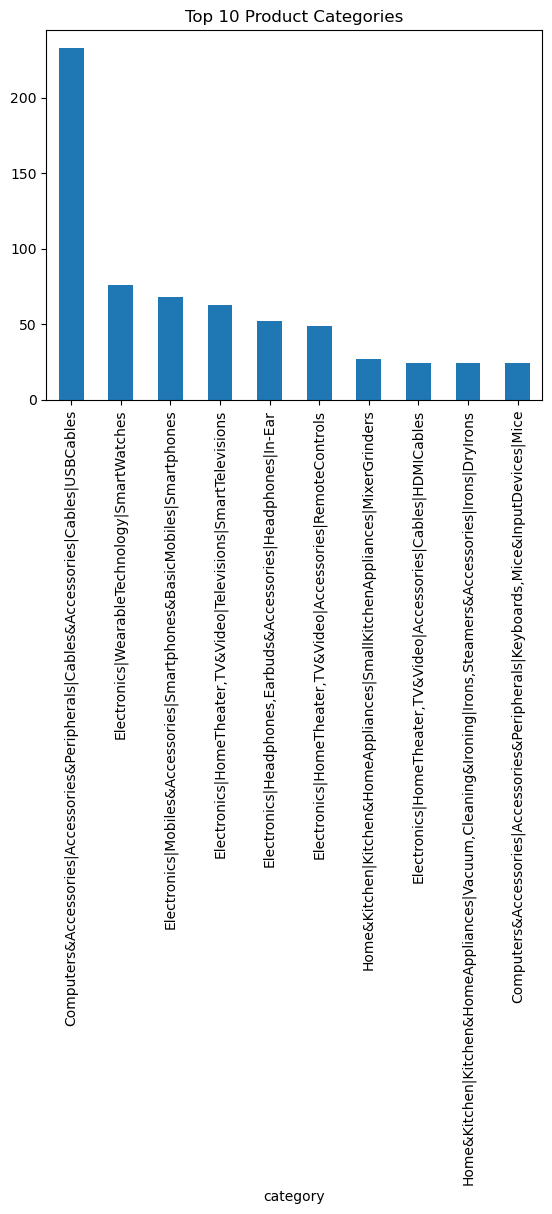

In [11]:
# Top 10 product categories sold 
sales_df['category'].value_counts().head(10).plot(kind='bar', title="Top 10 Product Categories")

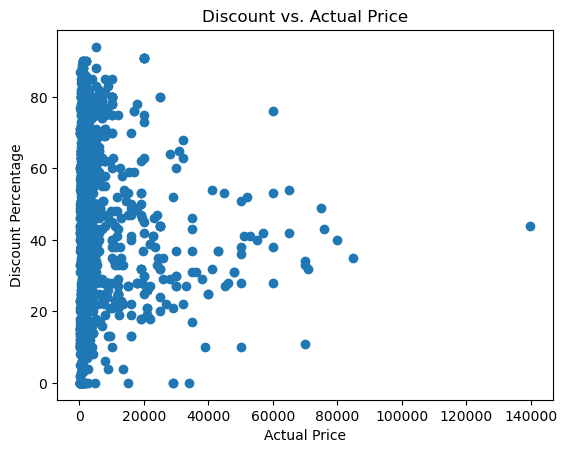

In [12]:
# Scatter plot of relationship between actual price and discount percentage
plt.scatter(sales_df['actual_price'], sales_df['discount_percentage'])
plt.xlabel("Actual Price")
plt.ylabel("Discount Percentage")
plt.title("Discount vs. Actual Price")
plt.show()

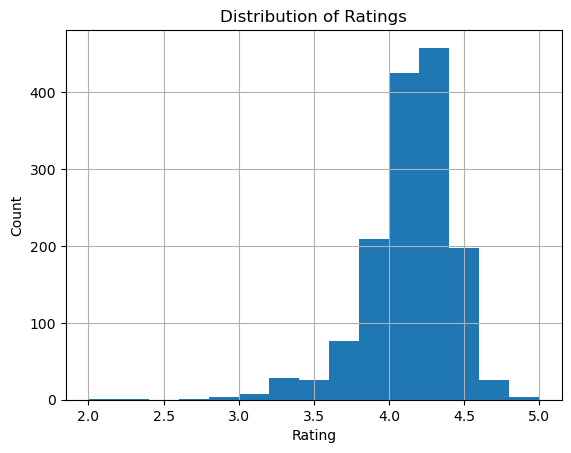

In [13]:
# Histogram visualizing the distribution of product ratings
sales_df['rating'].hist(bins=15)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

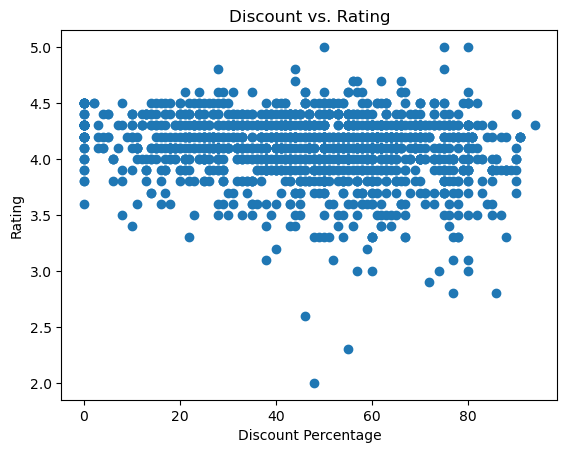

In [14]:
# Scatter plot of relationship between Dsicount percentage and Rating 
plt.scatter(sales_df['discount_percentage'], sales_df['rating'])
plt.xlabel("Discount Percentage")
plt.ylabel("Rating")
plt.title("Discount vs. Rating")
plt.show()

In [15]:
# Product with highest discount 
top_deals = sales_df.sort_values(by='discount_percentage', ascending=False)[['product_name', 'discount_percentage']].head(10)
print(top_deals)

                                           product_name  discount_percentage
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...                 94.0
368   Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...                 91.0
380   Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...                 91.0
334   Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...                 91.0
372   Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...                 91.0
364   Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...                 91.0
1026  beatXP Kitchen Scale Multipurpose Portable Ele...                 90.0
557   LAPSTER 12pcs Spiral Cable Protectors for Char...                 90.0
542   Sounce Protective Case Cover Compatible Boat X...                 90.0
407   Sounce Spiral Charger Cable Protector Data Cab...                 90.0


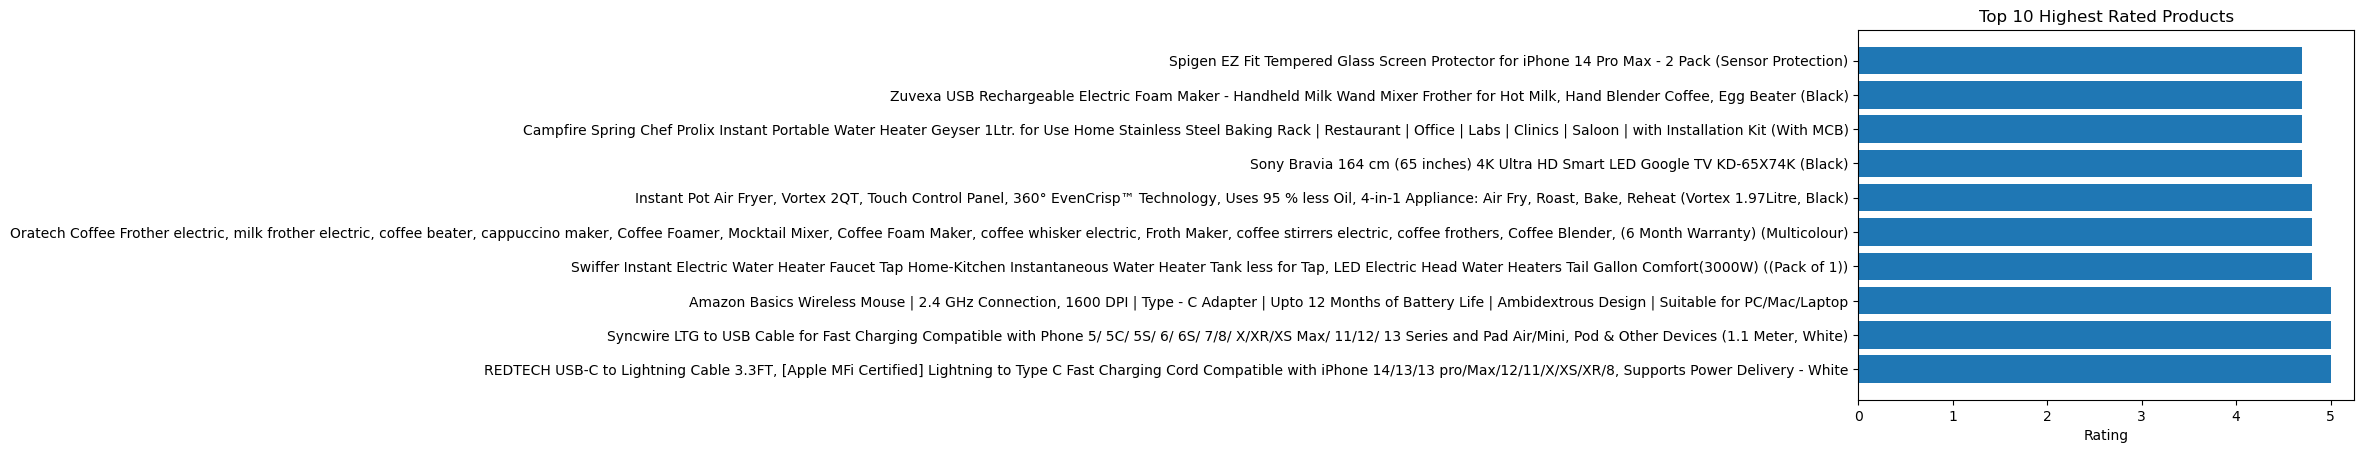

In [16]:
# Top 10 highest rated product with ordered according to their rating
top_rated = sales_df.sort_values(by='rating', ascending=False).head(10)
plt.barh(top_rated['product_name'], top_rated['rating'])
plt.xlabel("Rating")
plt.title("Top 10 Highest Rated Products")
plt.show()

In [17]:
# most_reviewed = sales_df.sort_values(by='rating_count', ascending=False).head(10)
# plt.barh(most_reviewed['product_name'], most_reviewed['rating_count'])
# plt.xlabel("Review Count")
# plt.title("Top 10 Most Reviewed Products")
# plt.show()

In [18]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

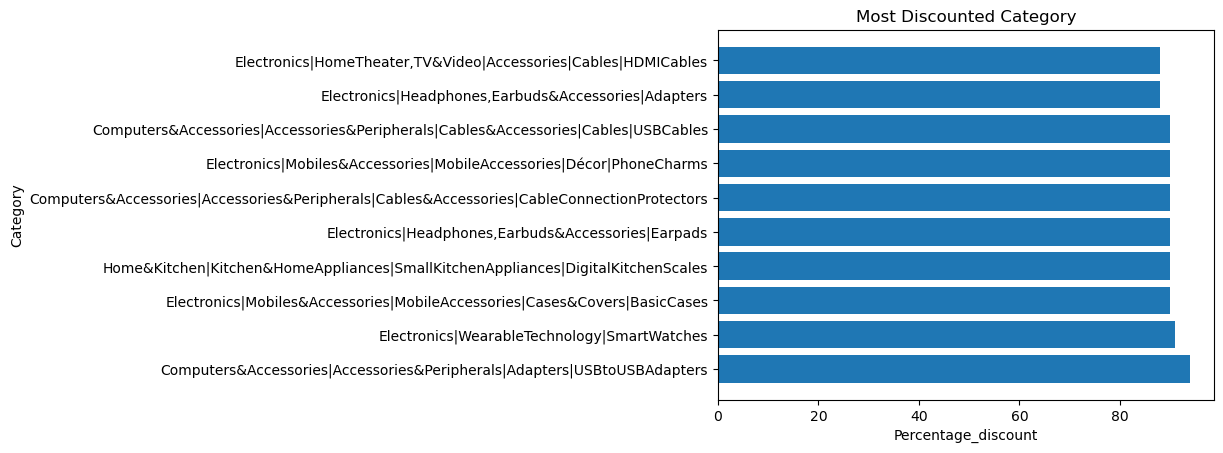

In [124]:
# Most Discounted Category

# Get Max discount percentage per category
top_10 = sales_df.groupby("category")["discount_percentage"].max().reset_index()

# Sort by discount percentage in descending order and select top 10
top_10 = top_10.sort_values(by="discount_percentage", ascending=False).head(10)
plt.barh(top_10["category"], top_10["discount_percentage"])
plt.xlabel("Percentage_discount")
plt.ylabel("Category")
plt.title("Most Discounted Category")
plt.show()